# Análise temporal do desmatamento na FLONA dos Tapajós e a relação com a ocorrência de focos de calor nos anos de 2013 a 2018

__Autores__: _Ana Larissa Ribeiro de Freitas, Cândida Caroline Souza de Santana Leite e Edson Mauricio Marques Ferrari_

### 1. Introdução

Os incêndios na vegetação são considerados como uma das maiores causas de danos à conservação da biodiversidade, de modo que frequentemente constituem uma perturbação a diversos ecossistemas. Aliado à intensidade, os episódios de incêndios e/ou queimadas podem implicar na redução da densidade arbórea, na perda da diversidade, na capacidade de rebrota, e diminuição da altura e diâmetro dos indivíduos (FIEDLER et al., 2004; SILVA et al., 2011; FRANCA-ROCHA et al. 2017; MIRANDA et al., 1996; GONÇALVES et al., 2011).

A Floresta Nacional Tapajós é pertencente ao bioma amazônico, com uma área de 527.319 hectares, entre os municípios de Aveiro, Belterra, Placas e Rurópolis, no Oeste do Estado do Pará. Desde antes de sua criação tem convivido com a ocorrência de áreas desmatadas e incêndios florestais, portanto foi inserida no Programa de Bom Manejo do Fogo, objetivando a prevenção de queimadas.

As secas também podem dobrar a taxa média de ocorrência de incêndios na Amazônia associada ao aumento da persistência do manejo de pastagens e dos incêndios de desmatamento. Esses fatores aumentam a probabilidade dos incêndios vazarem de áreas abertas para florestas adjacentes modificadas por humanos (bordas de florestas, fragmentos, florestas queimadas, derrubadas e secundárias), que tendem a ser mais suscetíveis ao fogo do que em regiões com grande densidade de florestas primárias não perturbadas (ARAGÃO et al., 2018).

Dessa forma, a utilização de dados de satélites contribui para o monitoramento da ocorrência de incêndios florestais a partir da detecção de cicatrizes de queimadas e focos de calor, este ultimo utilizado no projeto, são anomalias de temperatura que indicam fogo ativo (ANDERSON et al., 2019).


### 2. Metodologia

- Aquisição dos dados de entrada:
    - Limite da Flona Tapajós - ICMBIO(2012) - Formato: vetorial - [ICMBio](http://www.icmbio.gov.br/flonatapajos/)
    - Focos de Calor - BD Queimadas (2013-2018) (INPE, 2019)  - Formato: vetorial [BD Queimadas](http://www.inpe.br/queimadas/bdqueimadas#)
        - Condisiderando os focos de calor dentro e com buffer de 5 km dos limites da Flona Tapajós
    - Perda de vegetação (2013-2018) - Formato: raster (30x30m) [Global Florest Change](https://earthenginepartners.appspot.com/science-2013-global-forest)
- Manipulação dos dados vetoriais e raster;
- Geração de mapas e quantificação de focos de calor e área de perda de vegetação por ano;
- Quantificação dos focos de calor dentro da FLona, os meses de detecção, os municípios e os satélites.

### 3. Procedimentos

- __Importando as bibliotecas__

In [1]:
import os
import geopandas as gpd
import gdal as gd
import pandas as pd

import fiona
import rasterio
import rasterio.mask

from math import ceil

import osr 
import ogr 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

=========================================================================================================================
- __Definindo as funções:__
    - _contador_ e _contador _ data_: para acessar o DataFrame dos arquivos e contar as variáveis desejadas;
    - _pontos _ poligonos_: para contar o número de pontos dentro de um polígono.

In [2]:
#Função para calcular o número de ocorrência de focos de calor por satélite e município por ano
def contador (lista, coluna_atributo):
    
    #Abrindo os arquivos
    open_focos2013 = gpd.read_file(focos2013)
    open_focos2014 = gpd.read_file(focos2014)
    open_focos2015 = gpd.read_file(focos2015)
    open_focos2016 = gpd.read_file(focos2016)
    open_focos2017 = gpd.read_file(focos2017)
    open_focos2018 = gpd.read_file(focos2018)

    lista_2013 = [0 for i in range (len(lista))]
    lista_2014 = [0 for i in range (len(lista))]
    lista_2015 = [0 for i in range (len(lista))]
    lista_2016 = [0 for i in range (len(lista))]
    lista_2017 = [0 for i in range (len(lista))]
    lista_2018 = [0 for i in range (len(lista))]

    atributo_2013 = open_focos2013[coluna_atributo]
    atributo_2014 = open_focos2014[coluna_atributo]
    atributo_2015 = open_focos2015[coluna_atributo]
    atributo_2016 = open_focos2016[coluna_atributo]
    atributo_2017 = open_focos2017[coluna_atributo]
    atributo_2018 = open_focos2018[coluna_atributo]

    #Somando o registro de focos de calor por data
    for j in range (len(lista)):
        soma = 0
        for i in range (len(atributo_2013)):
            b = lista[j]
            if atributo_2013[i] == b:
                soma += 1
            lista_2013[j]=soma
        soma = 0
        for i in range (len(atributo_2014)):
            b = lista[j]
            if atributo_2014[i] == b:
                soma += 1
            lista_2014[j]=soma
        soma = 0
        for i in range (len(atributo_2015)):
            b = lista[j]
            if atributo_2015[i] == b:
                soma += 1
            lista_2015[j]=soma
        soma = 0
        for i in range (len(atributo_2016)):
            b = lista[j]
            if atributo_2016[i] == b:
                soma += 1
            lista_2016[j]=soma
        soma = 0
        for i in range (len(atributo_2017)):
            b = lista[j]
            if atributo_2017[i] == b:
                soma += 1
            lista_2017[j]=soma
        soma = 0
        for i in range (len(atributo_2018)):
            b = lista[j]
            if atributo_2018[i] == b:
                soma += 1
            lista_2018[j]=soma

    #Fechando os arquivos
    open_focos2013 = None
    open_focos2014 = None
    open_focos2015 = None
    open_focos2016 = None
    open_focos2017 = None
    open_focos2018 = None

    return (lista_2013, lista_2014, lista_2015, lista_2016, lista_2017, lista_2018)

In [3]:
#Função para calcular o número de ocorrência de focos de calor por mês por ano
def contador_data (lista, coluna_atributo):
    
    #Abrindo os arquivos
    open_focos2013 = gpd.read_file(focos2013)
    open_focos2014 = gpd.read_file(focos2014)
    open_focos2015 = gpd.read_file(focos2015)
    open_focos2016 = gpd.read_file(focos2016)
    open_focos2017 = gpd.read_file(focos2017)
    open_focos2018 = gpd.read_file(focos2018)

    lista_2013 = [0 for i in range (len(lista))]
    lista_2014 = [0 for i in range (len(lista))]
    lista_2015 = [0 for i in range (len(lista))]
    lista_2016 = [0 for i in range (len(lista))]
    lista_2017 = [0 for i in range (len(lista))]
    lista_2018 = [0 for i in range (len(lista))]

    atributo_2013 = open_focos2013[coluna_atributo]
    atributo_2014 = open_focos2014[coluna_atributo]
    atributo_2015 = open_focos2015[coluna_atributo]
    atributo_2016 = open_focos2016[coluna_atributo]
    atributo_2017 = open_focos2017[coluna_atributo]
    atributo_2018 = open_focos2018[coluna_atributo]

    #Somando o registro de focos de calor por data
    for j in range (len(lista)):
        soma = 0
        for i in range (len(atributo_2013)):
            b = lista[j]
            if atributo_2013[i][5:7] == b:
                soma += 1
            lista_2013[j]=soma
        soma = 0
        for i in range (len(atributo_2014)):
            b = lista[j]
            if atributo_2014[i][5:7] == b:
                soma += 1
            lista_2014[j]=soma
        soma = 0
        for i in range (len(atributo_2015)):
            b = lista[j]
            if atributo_2015[i][5:7] == b:
                soma += 1
            lista_2015[j]=soma
        soma = 0
        for i in range (len(atributo_2016)):
            b = lista[j]
            if atributo_2016[i][5:7] == b:
                soma += 1
            lista_2016[j]=soma
        soma = 0
        for i in range (len(atributo_2017)):
            b = lista[j]
            if atributo_2017[i][5:7] == b:
                soma += 1
            lista_2017[j]=soma
        soma = 0
        for i in range (len(atributo_2018)):
            b = lista[j]
            if atributo_2018[i][5:7] == b:
                soma += 1
            lista_2018[j]=soma

    #Fechando os arquivos
    open_focos2013 = None
    open_focos2014 = None
    open_focos2015 = None
    open_focos2016 = None
    open_focos2017 = None
    open_focos2018 = None

    return (lista_2013, lista_2014, lista_2015, lista_2016, lista_2017, lista_2018)


In [4]:
#Função para calcular o número de focos de calor dentro da área da flona
def pontos_poligonos (flona_tapajos, focos):

    poligono = gpd.GeoDataFrame.from_file(flona_tapajos)
    ponto = gpd.GeoDataFrame.from_file(focos)
    
    #Copiando os dados dos pontos
    pts = ponto.copy() 

    #Criando uma lista para recber o número total de pontos encontrados
    pontos_poligono = []

    #Percorrendo o polígono 
    for i, poly in poligono.iterrows():

        #Criando uma lista para receber o número de pontos no polígonos
        pontos_no_poligono = []

        #Percorrendo os pontos para cada linha
        for j, pt in pts.iterrows():
            
            #Verificando se a geometria do polígono contém o geometria dos pontos
            if poly.geometry.contains(pt.geometry):
                
                #Atribuindo a geometria dos pontos na lista criada anteriormente
                pontos_no_poligono.append(pt.geometry)
                pts = pts.drop([j])
        
        #Atribuindo o tamanho/número de pontos na lista
        pontos_poligono.append(len(pontos_no_poligono))

    return (pontos_poligono)
#Fonte: https://stackoverflow.com/questions/27606924/count-number-of-points-in-multipolygon-shapefile-using-python

=========================================================================================================================
- __Definindo os nomes dos dados de entrada e saída__
    - _Entrada:_ Flona Tapajós, perda florestal, focos de calor (por ano);
    - _Saída:_ Buffer Flona Tapajós, recorte da perda florestal, polígono perda florestal.

In [5]:
#Mudando o diretório onde está salvo os dados de entrada
os.chdir(r'C:\Users\Edson Ferrari\Documents\Trabalho_Final\BD')

#Atribuindo variáveis para os dados de entrada
flona_tapajos_filename = '.\FLONA_Tapajos.shp' #Shapefile do limite da área de estudo

perda_vegetacao_filename = '.\Hansen_GFC-2018-v1.6_lossyear_00N_060W.tif' #Raster de perda florestal

#Shapefile de perda florestal
focos2013 = '.\Focos.2013-01-01.2013-12-31.shp'
focos2014 = '.\Focos.2014-01-01.2014-12-31.shp'
focos2015 = '.\Focos.2015-01-01.2015-12-31.shp'
focos2016 = '.\Focos.2016-01-01.2016-12-31.shp'
focos2017 = '.\Focos.2017-01-01.2017-12-31.shp'
focos2018 = '.\Focos.2018-01-01.2018-12-31.shp'

#Atribuindo variáveis para os dados de saida
flona_buffer_5km_filename = '.\FLONA_Tapajos_buffer.shp' #Arquivo buffer
perda_veg_clip_filename = '.\Hansen_GFC-2018-v1.6_lossyear_00N_060W_clip.tif' #Arquivo recorte
perda_veg_poligono = '.\perda_vegetacao_poligono.shp' #Arquivo polígono do raster
perda_veg_poligono_UTM = '.\perda_vegetacao_poligono_UTM.shp' #Arquivo reprojetado

=========================================================================================================================
- __Buffer__
    - O buffer foi gerado por meio da função '.buffer()' da biblioteca Geopandas, definindo a distância do buffer com relação as coordenadas geográficas no Equador (1° - 111km);
    - Ao gerar o buffer, o arquivo .prj do shapefile não definiu o sistema de projeção, portanto foi realizado uma operação de abertura do arquivo e, em seguida, a escrita da projeção com relação ao sistema de projeção do limite da Flona.

In [6]:
#Fazendo o buffer do limite da Flona Tapajós
flona_tapajos = gpd.read_file(flona_tapajos_filename)

buffer_distance = 5/111 # Definindo distância do buffer (geográfico)
buffer_flona = flona_tapajos.buffer(buffer_distance) #Criando o buffer
buffer_flona.to_file(flona_buffer_5km_filename) #Salvando o buffer criado

#Abrindo o arquivo .prj do shapefile criado e adicionando o sistema de projeção geográfico
prj = open('.\FLONA_Tapajos_buffer.prj', 'w')
projecao = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],' \
             'PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]'
prj.write(projecao)
prj.close()

=========================================================================================================================
- __Recorte do Raster__
    - O recorte do raster da perda de florestal foi realizado a partir das bibliotecas Fiona e Rasterio, para abertura dos arquivos shapefile (limite da Flona Tapajós) e do raster (perda florestal);
    - Pela função '.mask.mask()' do Fiona foi realizado o recorte do raster; 
    - Em seguinda o preenchimento do metadados do raster de saída.

In [7]:
#Recorte do Raster (Perda Florestal) com o Shapefile (Limite Flona Tapajos com Buffer)
with fiona.open(flona_buffer_5km_filename, "r") as shapefile: #Abrindo o buffer criado e fechando o arquivo
    features = [feature["geometry"] for feature in shapefile] #Pegando as features do buffer
    
with rasterio.open(perda_vegetacao_filename) as src:  #Abrindo o Tiff a ser recortado
    out_image, out_transform = rasterio.mask.mask(src, features, crop=True) #Imagem de saída e parametros de transformação
    out_meta = src.meta.copy() #Copiando o metadados do tiff

out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform}) #Preenchendo o dicionário do novo metadados

with rasterio.open(perda_veg_clip_filename, "w", **out_meta) as dest: #Escrevendo a imagem de saída no diretório / ** Desempacotando o dicionário
    dest.write(out_image)

=========================================================================================================================
- __Conversão raster em polígono__
    - Por meio da biblioteca Gdal foi realizado a conversão do raster para polígono pela função '.poligonize()';
    - Ao gerar a poligonização, o arquivo .prj do shapefile não definiu o sistema de projeção, portanto foi realizado uma operação de abertura do arquivo e em seguida a escrita da projeção com relação ao sistema de projeção do limite da Flona.

In [8]:
#Convertendo o raster em polígono

perda_vegetacao_dataset = gd.Open(perda_veg_clip_filename) #Abrindo o arquivo
banda = perda_vegetacao_dataset.GetRasterBand(1) #Atribuindo o número de bandas
bandaArray = banda.ReadAsArray() #Lendo o banda como Array
perda_vegetacao_filename = "perda_vegetacao_poligono" #Atribuindo o nome de saída
driver = ogr.GetDriverByName("ESRI Shapefile") #Atribuindo o tipo de arquivo de saída

#Verificando a existência de um arquivo com o mesmo nome já criado - Se existir o arquivo será substituído pelo novo criado
if os.path.exists(perda_vegetacao_filename +".shp"):
    driver.DeleteDataSource(perda_vegetacao_filename +".shp")

#Definindo projeção
dest_srs = ogr.osr.SpatialReference() 
dest_srs.ImportFromEPSG(4326)

#Criando a fonte de dados do shapefile 
dataset_saida = driver.CreateDataSource(perda_vegetacao_filename+ ".shp")
layer_saida = dataset_saida.CreateLayer("polygonized",  dest_srs)

#Criando um campo na tabela de atributos para receber o valor do ano da perda de vegetação
campo_atributos = ogr.FieldDefn('Ano', ogr.OFTInteger)
layer_saida.CreateField(campo_atributos)

#Comando para realizar o polígono
gd.Polygonize( banda, None, layer_saida, 0, [], callback=None)
dataset_saida.Destroy()
perda_vegetacao_dataset = None #Fechando o raster aberto no início

#FONTE: https://gis.stackexchange.com/questions/92176/gdal-polygonize-in-python-creating-blank-polygon

#Abrindo o arquivo .prj do shapefile criado e adicionando o sistema de projeção geográfico
prj = open('.\perda_vegetacao_poligono.prj', 'w')
projecao = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],' \
             'PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]'
prj.write(projecao)
prj.close()

=========================================================================================================================
- __Cálculo de área__
    - Por meio da função '.GetArea()' da biblioteca Ogr foi realizado o cálculo da área de cada polígono, e seu valor foi adicionado no DataFrame do próprio arquivo por meio da criação do campo 'area_km' e preenchimento com os valores da área para cada geometria do arquivo.

In [9]:
#Cálculo da área dos polígonos de perda florestal criado anteriormente

#Abrindo o arquivo
driver = ogr.GetDriverByName("ESRI Shapefile")
dados_entrada = driver.Open(perda_veg_poligono_UTM, update=True)
layer = dados_entrada.GetLayer()

#Criando um campo na tabela de abributos para receber o valor da área calculada
perda = ogr.FieldDefn('area_km', ogr.OFTReal)
layer.CreateField(perda)

#Calculando a área para cada geometria
for feature in layer:
    geomemtria = feature.GetGeometryRef()
    area = geomemtria.GetArea()/1000000 #Para calcular em km²
    feature.SetField("area_km", area)
    layer.SetFeature(feature)

#Fechando o arquivo
dataSource=None

=========================================================================================================================
- __Cálculo do número de ocorrência de focos e das áreas de perda florestal de cada ano__
    - Por meio da função '.count()' da biblioteca Geopandas foi realizado a contagem do número de ocorrência de focos de calor para cada arquivo, levando em consideração todo o DataFrame;
    - O somatório das áreas de perda de vegetação foi realizado por meio do algoritmo de repetição 'for' e de condicional 'if', acessando o DataFrame do arquivo e percorrendo cada linha da coluna 'Ano' e atribuindo o valor da somatória área da coluna 'area_km'.
    

In [10]:
#Calculando a ocorrência do número de focos por ano e o somatório das áreas de cada ano

#Abrindo os arquivos
perda_veg = gpd.read_file(perda_veg_poligono_UTM)
open_focos2013 = gpd.read_file(focos2013)
open_focos2014 = gpd.read_file(focos2014)
open_focos2015 = gpd.read_file(focos2015)
open_focos2016 = gpd.read_file(focos2016)
open_focos2017 = gpd.read_file(focos2017)
open_focos2018 = gpd.read_file(focos2018)

#Contando o número de ocorrência de focos de calor por ano
n_2013 = open_focos2013.count()[0]
n_2014 = open_focos2014.count()[0]
n_2015 = open_focos2015.count()[0]
n_2016 = open_focos2016.count()[0]
n_2017 = open_focos2017.count()[0]
n_2018 = open_focos2018.count()[0]

#Calculando o número de perda florestal por ano
area13 = 0.0
area14 = 0.0
area15 = 0.0
area16 = 0.0
area17 = 0.0
area18 = 0.0

for i in range (len(perda_veg)):
    if perda_veg.at[i, 'Ano']==13:
        area13 += perda_veg.at[i, 'area_km']
    if perda_veg.at[i, 'Ano']==14:
        area14 += perda_veg.at[i, 'area_km']
    if perda_veg.at[i, 'Ano']==15:
        area15 += perda_veg.at[i, 'area_km']
    if perda_veg.at[i, 'Ano']==16:
        area16 += perda_veg.at[i, 'area_km']
    if perda_veg.at[i, 'Ano']==17:
        area17 += perda_veg.at[i, 'area_km']
    if perda_veg.at[i, 'Ano']==18:
        area18 += perda_veg.at[i, 'area_km']

#Fechando os arquivos
perda_veg = None
open_focos2013 = None
open_focos2014 = None
open_focos2015 = None
open_focos2016 = None
open_focos2017 = None
open_focos2018 = None

=========================================================================================================================
- __Gráfico:__ Quantidade de ocorrência de focos de calor e área perdida por ano
    - Por meio da função '.subplot()' e '.bar()' da biblioteca Matiplotlib, foi gerado o gráfico de barras.

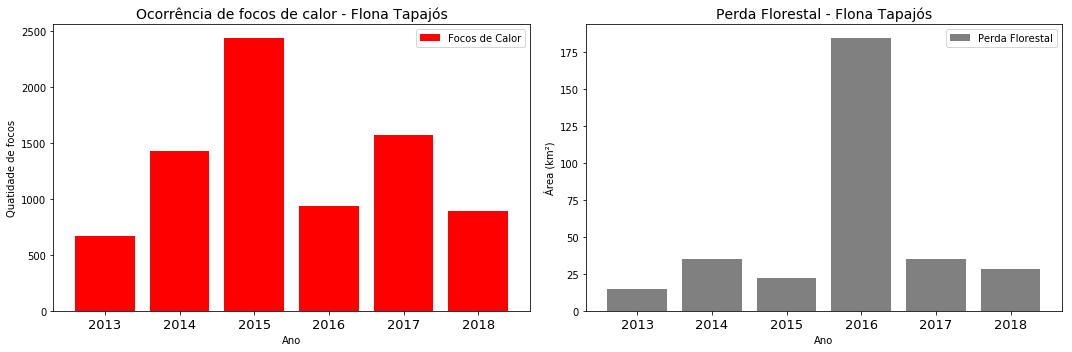

In [11]:
#Gráfico de número de focos por ano e perda de vegetação por ano
valores_n_focos = (n_2013, n_2014, n_2015, n_2016, n_2017, n_2018)
valores_p_area = (area13, area14, area15, area16, area17, area18)
eixo = ('2013', '2014', '2015', '2016', '2017', '2018')

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.bar (eixo, valores_n_focos, color='red', label='Focos de Calor')
plt.xlabel('Ano', size=10) 
plt.ylabel('Quatidade de focos',  size=10) 
plt.title('Ocorrência de focos de calor - Flona Tapajós', size=14) 
plt.xticks(eixo, size=13) 
plt.legend() 

plt.subplot(122)
plt.bar (eixo, valores_p_area, color='gray', label='Perda Florestal')
plt.xlabel('Ano', size=10) 
plt.ylabel('Área (km²)',  size=10) 
plt.title('Perda Florestal - Flona Tapajós', size=14) 
plt.xticks(eixo, size=13) 
plt.legend() 
plt.tight_layout() 

plt.show()

=========================================================================================================================

- __Contagem:__ Número de focos de calor dentro dos limites da Flona Tapajós
    - Com a definição da função 'pontos_poligonos' foi realizado a operação de contagem do número da ocorrência de focos de calor dentro dos limites da Flona Tapajós. O retorno da função foi atribuído a uma variável que recebeu o valor da lista de retorno.

In [12]:
#Calculando o número de focos de calor dentro da flona

#Pegando o número de focos de calor - a função retorna uma lista com um único valor
num_focos2013 = pontos_poligonos(flona_tapajos_filename, focos2013)[0]
num_focos2014 = pontos_poligonos(flona_tapajos_filename, focos2014)[0]
num_focos2015 = pontos_poligonos(flona_tapajos_filename, focos2015)[0]
num_focos2016 = pontos_poligonos(flona_tapajos_filename, focos2016)[0]
num_focos2017 = pontos_poligonos(flona_tapajos_filename, focos2017)[0]
num_focos2018 = pontos_poligonos(flona_tapajos_filename, focos2018)[0]

=========================================================================================================================
- __Gráfico:__ Ocorrência de focos de calor dentro da Flona Tapajós
    - Por meio da função '.bar()' da biblioteca Matiplotlib, foi gerado o gráfico de barras.

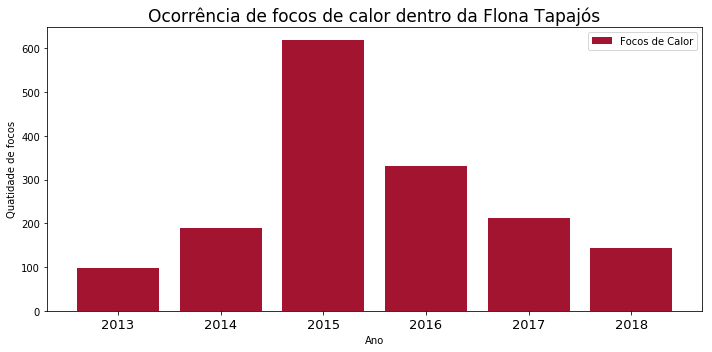

In [13]:
#Gráfico de número de focos por ano dentro da Flona
valores_num_focos = (num_focos2013, num_focos2014, num_focos2015, num_focos2016, num_focos2017, num_focos2018)
eixo = ('2013', '2014', '2015', '2016', '2017', '2018')

plt.figure(figsize=(10, 5))
plt.bar (eixo, valores_num_focos, color='#A2142F', label='Focos de Calor')

plt.xlabel('Ano', size=10) 
plt.ylabel('Quatidade de focos',  size=10) 
plt.title('Ocorrência de focos de calor dentro da Flona Tapajós', size=17) 
plt.xticks(eixo, size=13) 
plt.legend() 
plt.tight_layout() 

plt.show()

=========================================================================================================================
- __Plotagem:__ Mapa de focos de calor, limite da FLona Tapajós e do buffer criado
    - Por meio da função '.read_file' da bilbioteca Geopandas foi acessado os arquivos;
    - Por meio da função '.plot()' e '.subplot()' da biblioteca Matiplotlib foram plotados os mapas de cada ano.

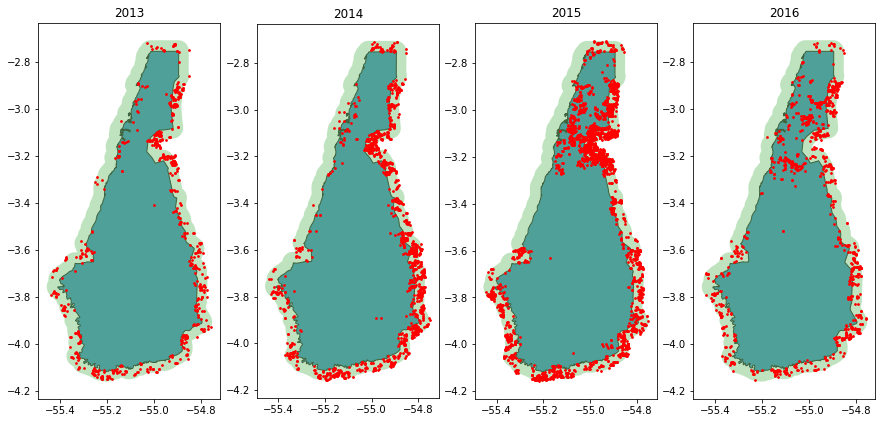

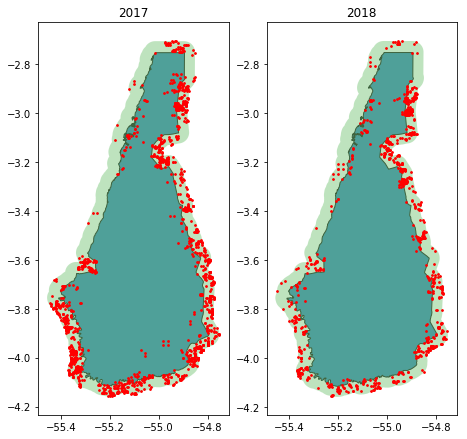

In [14]:
#Plotando mapa - limite Flona, zona de amortecimento, focos de calor

flona_limite = gpd.read_file(flona_tapajos_filename)
flona_limite_buffer = gpd.read_file(flona_buffer_5km_filename)
open_focos2013 = gpd.read_file(focos2013)
open_focos2014 = gpd.read_file(focos2014)
open_focos2015 = gpd.read_file(focos2015)
open_focos2016 = gpd.read_file(focos2016)
open_focos2017 = gpd.read_file(focos2017)
open_focos2018 = gpd.read_file(focos2018)

fig, (ax1, ax2, ax3, ax4) = plt.subplots (1, 4, figsize=(15, 13))
flona_limite.plot(edgecolor="black", ax=ax1)
flona_limite_buffer.plot(cmap='Accent',ax=ax1, alpha=.5)
open_focos2013.plot(color='red', ax=ax1, alpha=1, markersize=3)

flona_limite.plot(edgecolor="black", ax=ax2)
flona_limite_buffer.plot(cmap='Accent',ax=ax2, alpha=.5)
open_focos2014.plot(color='red', ax=ax2, alpha=1, markersize=3)

flona_limite.plot(edgecolor="black", ax=ax3)
flona_limite_buffer.plot(cmap='Accent',ax=ax3, alpha=.5)
open_focos2015.plot(color='red', ax=ax3, alpha=1, markersize=3)

flona_limite.plot(edgecolor="black", ax=ax4)
flona_limite_buffer.plot(cmap='Accent',ax=ax4, alpha=.5)
open_focos2016.plot(color='red', ax=ax4, alpha=1, markersize=3)

ax1.set_title('2013')
ax2.set_title('2014')
ax3.set_title('2015')
ax4.set_title('2016')

fig, (ax5, ax6) = plt.subplots (1, 2, figsize=(7.5, 9))
flona_limite.plot(edgecolor="black", ax=ax5)
flona_limite_buffer.plot(cmap='Accent',ax=ax5, alpha=.5)
open_focos2017.plot(color='red', ax=ax5, alpha=1, markersize=3)

flona_limite.plot(edgecolor="black", ax=ax6)
flona_limite_buffer.plot(cmap='Accent',ax=ax6, alpha=.5)
open_focos2018.plot(color='red', ax=ax6, alpha=1, markersize=3)

ax5.set_title('2017')
ax6.set_title('2018')

plt.show()

=========================================================================================================================
- __Plotagem:__ Mapa perda florestal
    - Por meio da função '.read_file' da bilbioteda Geopandas foram acessados os arquivos;
    - Por meio da função '.plot()' e '.subplot()' da biblioteca Matiplotlib foi plotado o mapa das perdas florestais.

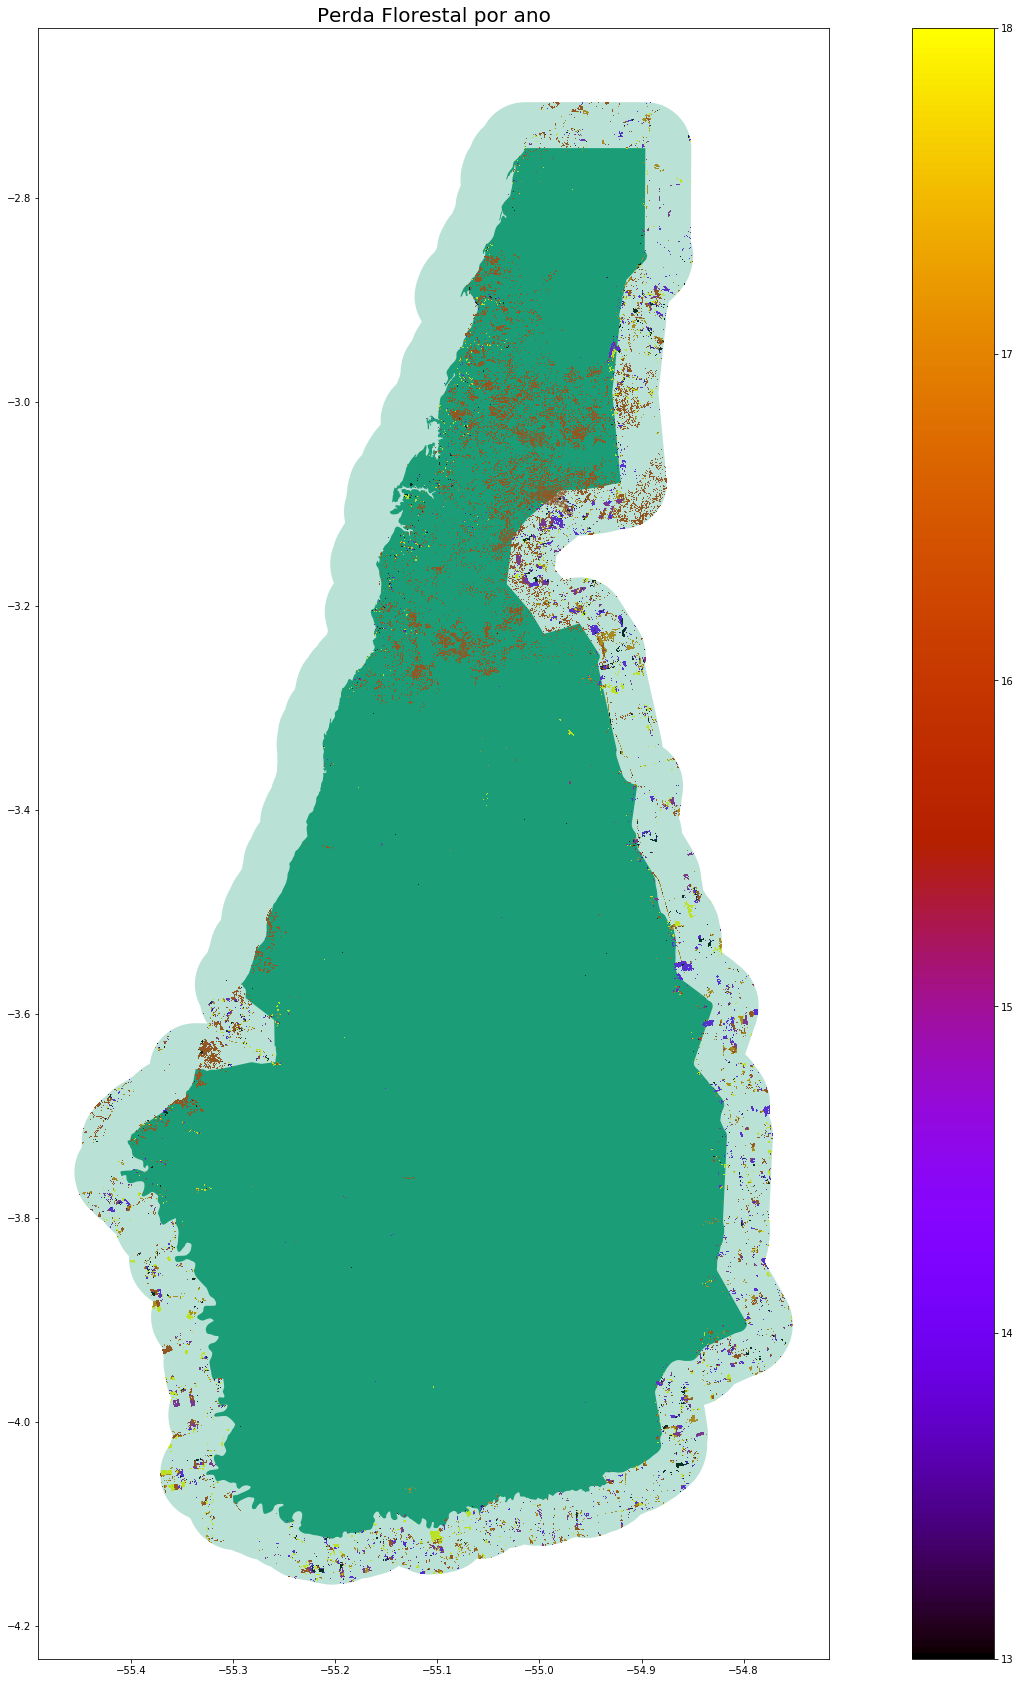

In [19]:
#Plotando mapa perda florestal

flona_limite = gpd.read_file(flona_tapajos_filename)
flona_limite_buffer = gpd.read_file(flona_buffer_5km_filename)
perda = gpd.read_file(perda_veg_poligono)

fig, ax = plt.subplots(figsize=(30, 30))

flona_limite.plot(cmap="Dark2", ax=ax)
perda.plot(column='Ano', legend=True, ax=ax, markersize=0.1, cmap='gnuplot')
flona_limite_buffer.plot(cmap='Dark2',ax=ax, alpha=.3)
ax.set_title('Perda Florestal por ano', size=20)
plt.show()

=========================================================================================================================

- __Contagem:__ Número de ocorrência de focos de calor por mês e por ano
    - Com a definição da função 'contador_data' foi realizado a operação de contagem do número da ocorrência de focos de calor por cada ano. O retorno da função foi atribuído a uma variável que recebeu o valor da lista de retorno.

- __Gráfico:__ Ocorrência de focos de calor por mês 
    - Por meio da função '.plot()' da biblioteca Matiplotlib foi gerado o gráfico de linhas.

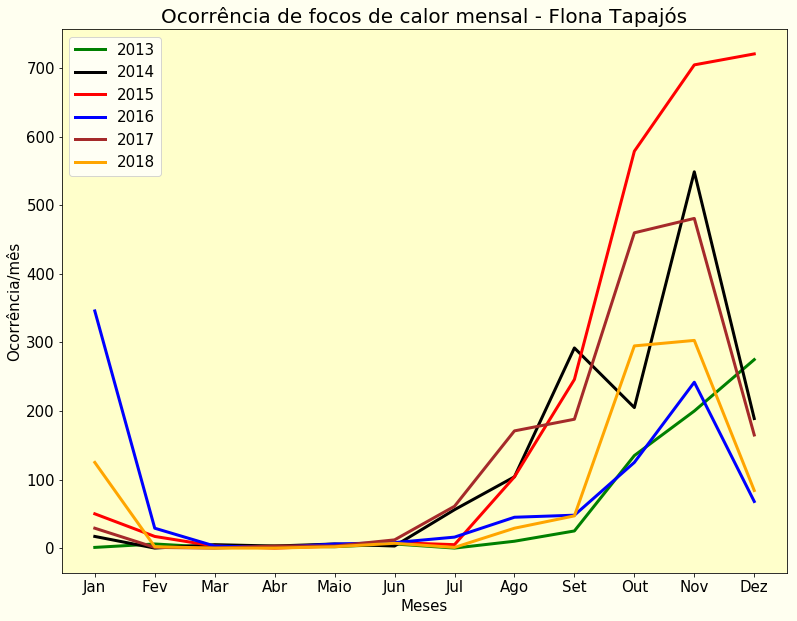

In [16]:
#Analisando o registro de focos de calor por mês

data = ['01','02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

atributo = 'DataHora'

d_2013 = contador_data(data, atributo)[0]
d_2014 = contador_data(data, atributo)[1]
d_2015 = contador_data(data, atributo)[2]
d_2016 = contador_data(data, atributo)[3]
d_2017 = contador_data(data, atributo)[4]
d_2018 = contador_data(data, atributo)[5]

#Plotando o gráfico de registro de  focos de calor por mês
plt.figure(figsize=(13, 10), facecolor= 'ivory')
ax = plt.gca()
ax.set_facecolor('xkcd:ivory')

plt.plot(data, d_2013, label='2013', color= 'green', linewidth=3)
plt.plot(data, d_2014, label='2014', color= 'black', linewidth=3)
plt.plot(data, d_2015, label='2015', color= 'red',linewidth=3)
plt.plot(data, d_2016, label='2016', color= 'blue', linewidth=3)
plt.plot(data, d_2017, label='2017', color= 'brown', linewidth=3)
plt.plot(data, d_2018, label='2018', color= 'orange', linewidth=3)

plt.xlabel('Meses', fontsize=15) 
plt.ylabel('Ocorrência/mês',  fontsize=15) 
plt.title('Ocorrência de focos de calor mensal - Flona Tapajós', fontsize=20) 
plt.yticks (fontsize=15)
plt.xticks (data, ['Jan','Fev', 'Mar', 'Abr', 'Maio', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=15)
plt.legend(fontsize=15) 

plt.show()

=========================================================================================================================
- __Contagem:__ Número de ocorrência de focos de calor por município e por ano
    - Com a definição da função 'contador' foi realizado a operação de contagem do número da ocorrência de focos de calor por município para cada ano. O retorno da função foi atribuído a uma variável que recebeu o valor da lista de retorno.
    
- __Gráfico:__ Ocorrência de focos de calor por município
    - Por meio da função '.plot()' da biblioteca do Matiplotlib, foi gerado o gráfico de linhas.

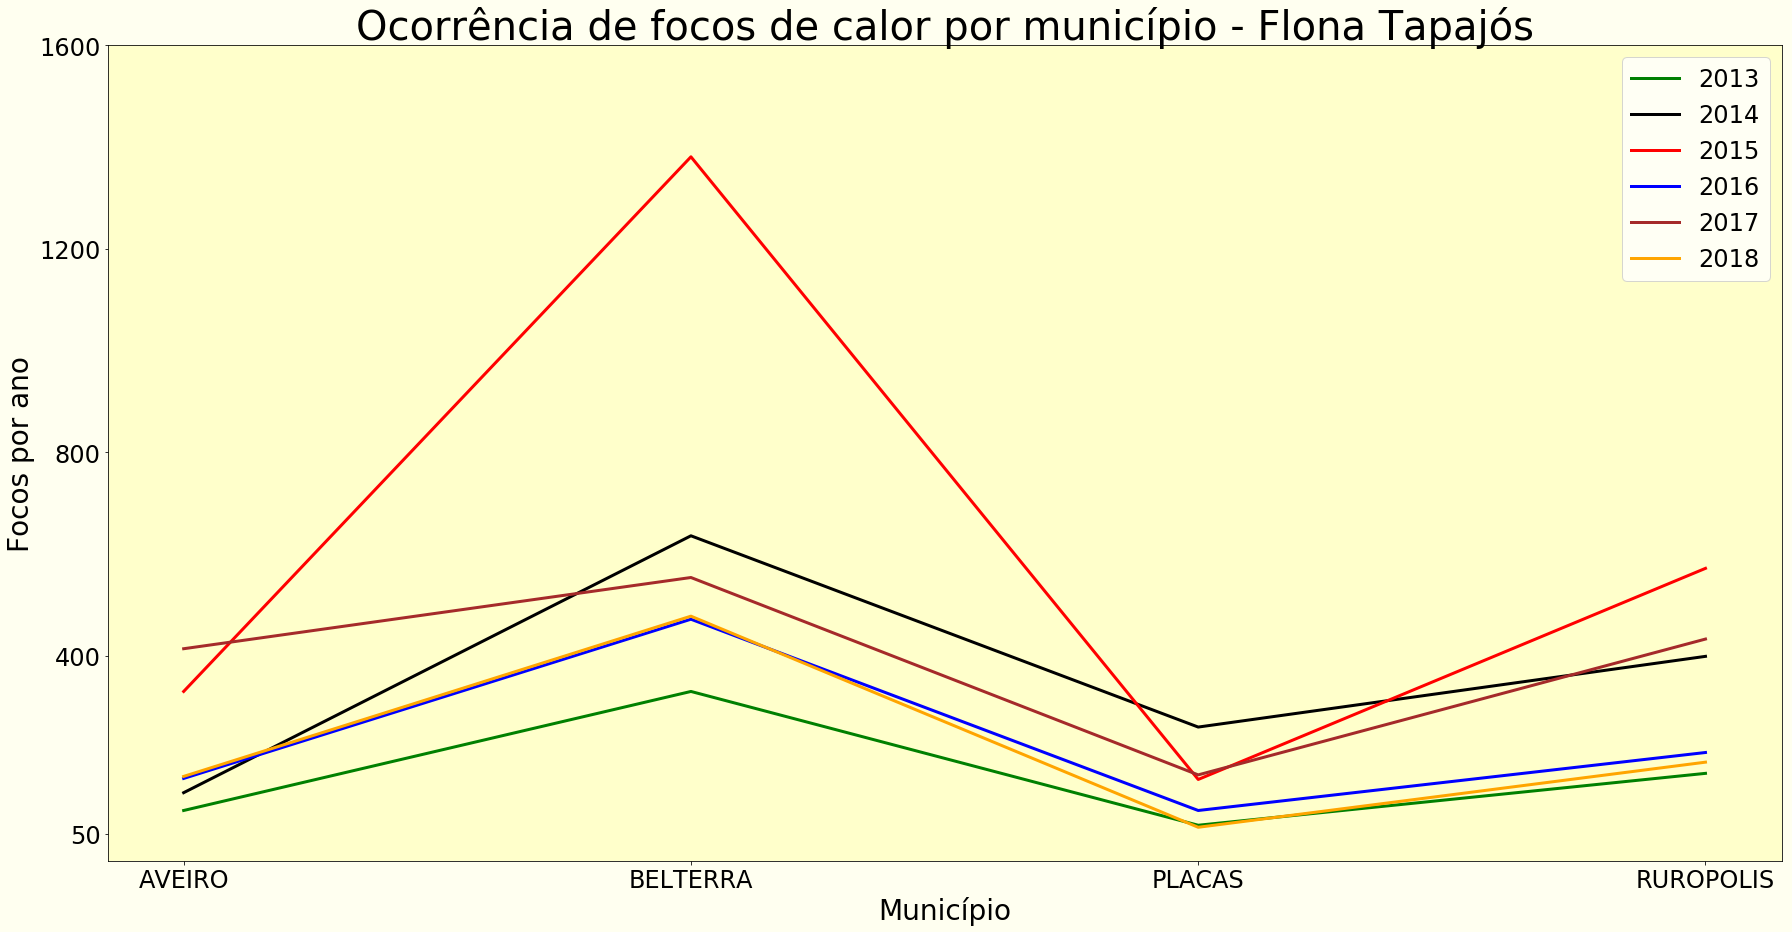

In [17]:
#Analisando o registro de focos de calor por municipio

municipio = ['AVEIRO', 'BELTERRA', 'PLACAS', 'RUROPOLIS']

atributo = 'Municipi'

muni_2013 = contador(municipio, atributo)[0]
muni_2014 = contador(municipio, atributo)[1]
muni_2015 = contador(municipio, atributo)[2]
muni_2016 = contador(municipio, atributo)[3]
muni_2017 = contador(municipio, atributo)[4]
muni_2018 = contador(municipio, atributo)[5]

#Plotando o gráfico de registro de focos de calor por monicípio por ano
plt.figure(figsize=(30, 15), facecolor= 'ivory')
ax = plt.gca()
ax.set_facecolor('xkcd:ivory')

plt.plot(municipio, muni_2013, label='2013', color= 'green', linewidth=3)
plt.plot(municipio, muni_2014, label='2014', color= 'black', linewidth=3)
plt.plot(municipio, muni_2015, label='2015', color= 'red',linewidth=3)
plt.plot(municipio, muni_2016, label='2016', color= 'blue', linewidth=3)
plt.plot(municipio, muni_2017, label='2017', color= 'brown', linewidth=3)
plt.plot(municipio, muni_2018, label='2018', color= 'orange', linewidth=3)

plt.ylabel('Focos por ano', fontsize=28, ) 
plt.xlabel('Município',  fontsize=28) 
plt.title('Ocorrência de focos de calor por município - Flona Tapajós', fontsize=40) 
plt.yticks ([50, 400, 800, 1200, 1600], fontsize=24)
plt.xticks (municipio, fontsize=24)
plt.legend(fontsize=24) 

plt.show()

=========================================================================================================================
- __Contagem:__ Número de ocorrência de focos de calor por satélite
    - Com a definição da função 'contador' foi realizado a operação de contagem do número da ocorrência de focos de calor por satélite para cada ano. O retorno da função foi atribuído a uma variável que recebeu o valor da lista de retorno.
    
- __Gráfico:__ Ocorrência de focos de calor por satélote
    - Por meio da função '.plot()' da biblioteca Matiplotlib foi gerado o gráfico de linhas.

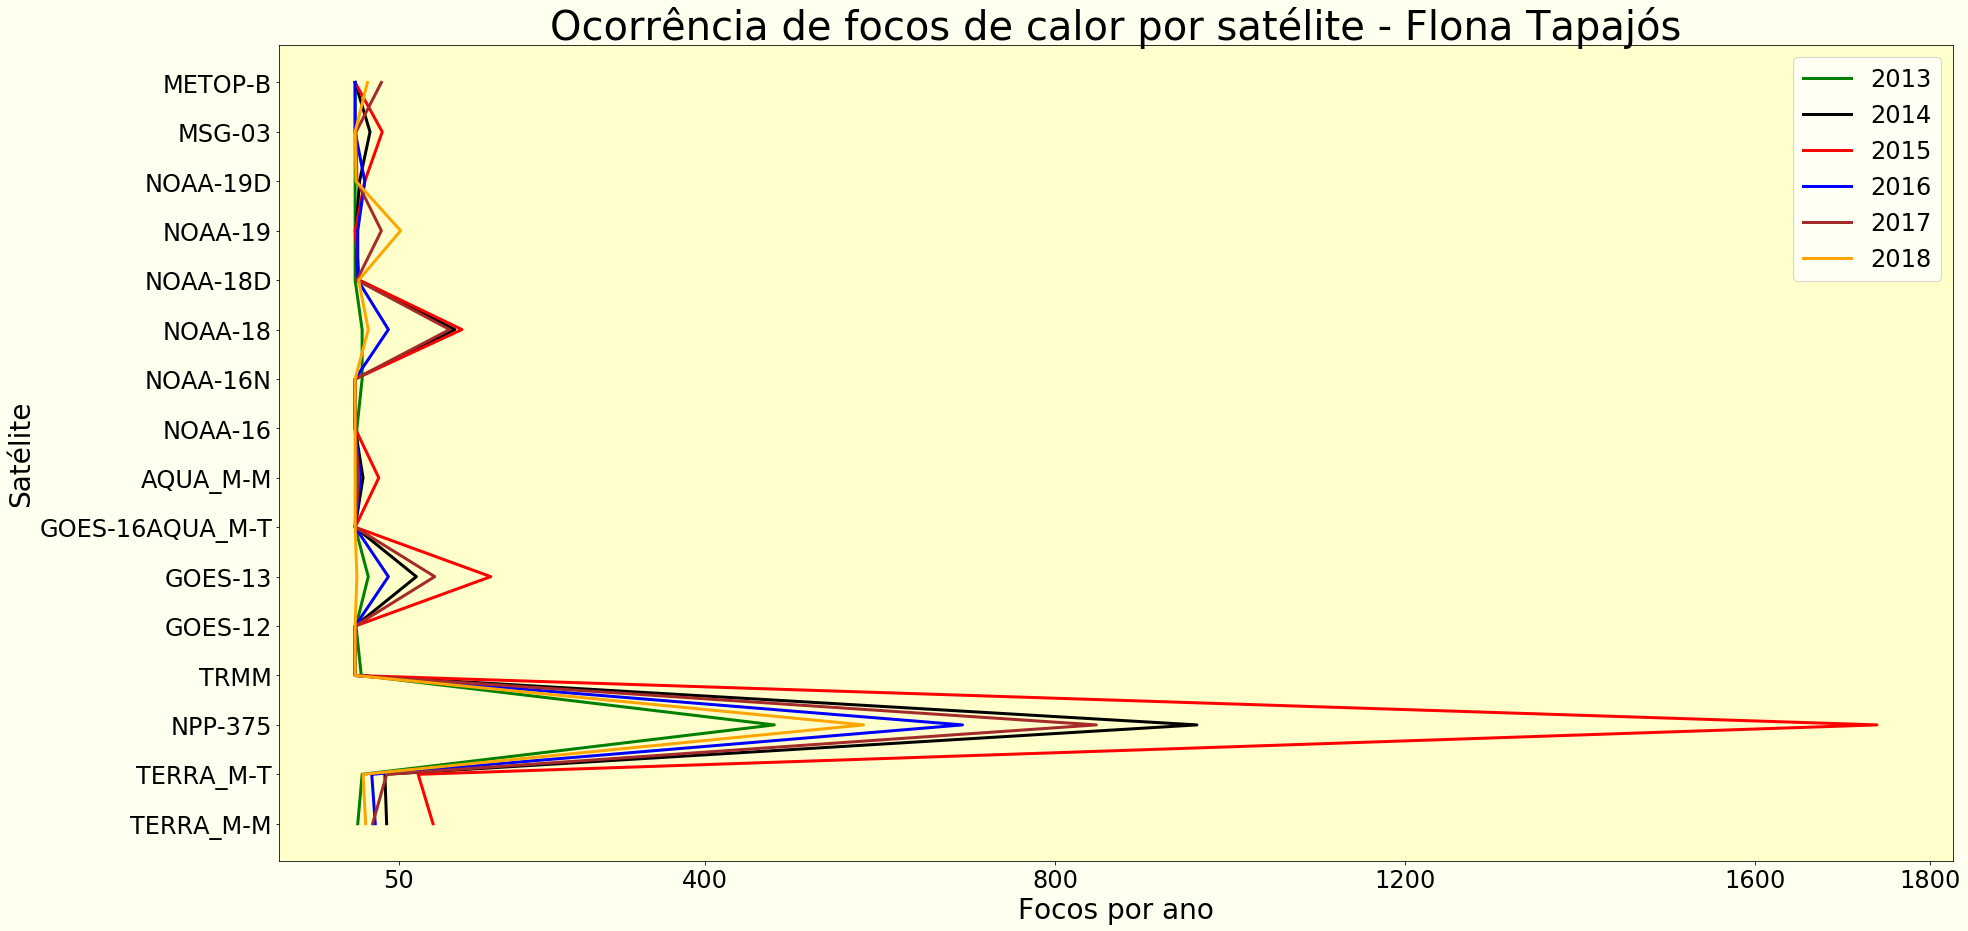

In [18]:
#Analisando o registro de focos de calor por satélite

satelite = ['TERRA_M-M', 'TERRA_M-T', 'NPP-375', 'TRMM', 'GOES-12', 'GOES-13', 'GOES-16''AQUA_M-T',
            'AQUA_M-M', 'NOAA-16', 'NOAA-16N', 'NOAA-18', 'NOAA-18D' , 'NOAA-19', 'NOAA-19D', 'MSG-03',
            'METOP-B']

atributo = 'Satelite'

s_2013 = contador(satelite, atributo)[0]
s_2014 = contador(satelite, atributo)[1]
s_2015 = contador(satelite, atributo)[2]
s_2016 = contador(satelite, atributo)[3]
s_2017 = contador(satelite, atributo)[4]
s_2018 = contador(satelite, atributo)[5]

#Plotando o gráfico de registro de satélites por ano
plt.figure(figsize=(30, 15), facecolor= 'ivory')
ax = plt.gca()
ax.set_facecolor('xkcd:ivory')

plt.plot(s_2013, satelite, label='2013', color= 'green', linewidth=3)
plt.plot(s_2014, satelite, label='2014', color= 'black', linewidth=3)
plt.plot(s_2015, satelite, label='2015', color= 'red',linewidth=3)
plt.plot(s_2016, satelite, label='2016', color= 'blue', linewidth=3)
plt.plot(s_2017, satelite, label='2017', color= 'brown', linewidth=3)
plt.plot(s_2018, satelite, label='2018', color= 'orange', linewidth=3)

plt.xlabel('Focos por ano', fontsize=28, ) 
plt.ylabel('Satélite',  fontsize=28) 
plt.title('Ocorrência de focos de calor por satélite - Flona Tapajós', fontsize=40) 
plt.xticks ([50, 400, 800, 1200, 1600, 1800], fontsize=24)
plt.yticks (satelite, fontsize=24)
plt.legend(fontsize=24) 

plt.show()

### 5. Considerações finais e recomendações

- Foi possível perceber um aumento considerável na quantidade de focos de calor no ano de 2015, inclusive atingindo áreas no interior da FLONA. Pode-se inferir que essa diferença esteja relacionada à anomalia climática, provocada pelo El Niño, iniciado no ano anterior.
- Além disso, observa-se o mesmo salto nos valores de áreas de perda da vegetação para o ano de 2016, atestando a possível correlação existente entre o ateio do fogo e a supressão da vegetação.
- Como recomendação, sugere-se, que adicionalmente à ocorrência de focos de calor e perda da vegetação sejam analisadas as cicatrizes de incêndios, visto que nem sempre os focos indicam de fato um episódio de queima e sua intensidade.

### REFERÊNCIAS

1. Anderson, L. O., Marchezin, V.,Morello, T. F., Cunningham, C. A. Conceptual model of disaster risk management and warning system associated with wildfires and public policy challenges in Brazil. __Territorium__: Revista Portuguesa de riscos, prevenção e segurança, [s.l.], n. 26, p.43-61, 2019. Coimbra University Press.
         
2. Aragão,  L.  E.  o.  c.,  Anderson,  L.o.,  Fonseca,  M.  G.,  Rosan,  T.  M.,  Vedovato,  L.,  Wagner,  F.,  silva,  c.,  Júnior,  c.,,  Arai,  E.,  Aguiar.  A.  P.,  Narlow,  J.,  Berenguer, E., Deeter., M., Domingues, L., Gatti, L., Gloor, M., Malhi, Y., Marengo, J., Miller, J., Phillips, o.,  saatchi,  s.  (2018).  21st Century drought-related fires counteract the decline of Amazon deforestation carbon  emissions.  __Nature Communications__,  9,  536.  

3. FRANCA-ROCHA, W. J. S.; SANTOS, S. M. B.; GONCALVES, A. J. B.; FERREIRA-LEITE, F. Are There Mega Fires in Brazilian Savannas? The National Park of Chapada Diamantina Case (Bahia, Brazil) In: António José Bento Gonçalves; António Avelino Batista Vieira; Maria Rosário Melo Costa; José Tadeu Marques Aranha. (Org.). __Wildfires__: Perspectives, Issues and Challenges of the 21st Century. 1ed. Hauppauge, NY: Nova Science Publishers, Inc. v. 1, 2017, p. 29-54.

4. GONÇALVES, N. G.; MESQUITA, F. W.; LIMA, N. R. G.; COSLOPE, L. A.; LINTOMEN, B. S. Recorrência dos Incêndios e Fitossociologia da Vegetação em Áreas com Diferentes Regimes de Queima no Parque Nacional da Chapada Diamantina. __Biodiversidade Brasileira__. I(2), 2011, p. 161-179.

5. MIRANDA, H. S.; ROCHA E SILVA, E. P.; MIRANDA, A. C. Comportamento do Fogo em Queimadas de Campo Sujo. In: MIRANDA, H. S.; SAITO, C. H.; DIAS, B. F. de S. (Org.) __Impactos de queimadas em áreas de cerrado e restinga__. Brasília: UnB, ECL, 1996. p. 1 - 10.

6. SILVA, D. M.; LOIOLA, P. de P.; ROSATTI, N. B.; SILVA, I. A.; CIANCIARUSO, M. V.; BATALHA, M. A. Os Efeitos dos Regimes de Fogo sobre a Vegetação de Cerrado no Parque Nacional das Emas, GO: Considerações para a Conservação da Diversidade. __Biodiversidade Brasileira__, I(2), 2011, p. 26-39